# **Team ID:** section 302 team 2: 69373


# **Flare Information:**

**Flare name:** Flare 302-2 BH

**Flare date and time (in UCT) of the peak of the flare:** 2012-09-27
17:20

**Approximate peak height (in $W/m^2$):** 6.38 * 10^-6

**Flare subclass (e.g., C5):** C6

# **Weeks 8 and 9: Determing total energy of your own flare**

Welcome to Weeks 8 and 9! During these next two labs, you will be choosing your own flare to analyze from the Space Weather Data Portal and calculating the total energy of the flare. Your lab group has been assigned a flare class--you can find this assignment on Canvas. 

Remember, the [X-ray flare classification](https://spaceweather.com/glossary/flareclasses.html) represents the peak irradiance of the flare (as seen for wavelengths within the 1 to 8 $Å$ range) and   includes two parts. First, a letter (A, B, C, M, and X) representing an order of magnitude of the flare, and secondly, a number (1-9) within the specified order. For example, a X3 flare has a peak irradiance of $3 × 10^{-4}$ $W/m^2$; whereas, a M3 flare has ten times lower peak irradiance. If the flare is larger than an X9 ($9 \times 10^{-4} W/m^2$), then the number is extended beyond 9. For example, a X14 flare has a peak irradiance of $14 × 10^{-4} W/m^2$. 

Today, you will start working on five tasks. You do not have to finish today, as you will finish working on these in week 9, but **you should at least be starting the baseline correction in Task 4** by the end of lab today. 

> (1) Go to the Space Weather Data Portal and choose a flare from the assigned class.

> (2) Provide a description of the flare you chose at the top of the page and give the flare a unique name--be creative! 

> (3) Download the data from the flare into a CSV file.

> (4) Use a similar procedure from last weeks lab and modify the code you wrote to determine the total energy of the flare of this flare.

> (5) Document your code using markdown cells and comments to explain your procedure. **Save your colab notebook file as a PDF to turn in by 11pm MT the day after your Week 9 lab.**

> (6) Bonus: If you finish, find more flares to analyze! If you analyze more flares create a **new** Colab Notebook for each flare.

# **Task 1: Find your solar flare**

Go onto the [Space Weather Data Portal website](https://lasp.colorado.edu/space-weather-portal/) and follow the [tutorial posted on Canvas](https://canvas.colorado.edu/courses/64020/pages/week-8#Tutorial2) to find a flare of the assigned class type that occured during the **GOES-15 satellite solar maxiumum (01/01/2011 - 01/01/2015)**. 

Choose the flares to help the research project (i.e, not flares that have been previously analyzed in the class such as the Sept. 10th, 2017 flare or the flares from the baseline correction examples colab notebook which occurred on May 5th, 2015, November 11th, 2013 and March 31st, 2011).



# **Task 2: Describe your flare**

Take a minute to provide the flare information at the top of the page. Here, create a new markdown cell below and give a general description of any features of the flare that stand out to you. In particular, please discuss the circumstances of the flares occurance (e.g., was it part of a group of intense solar activitiy or an isolated flare). You may also add graphs or pictures of the flare, links to articles about the flare, etc.

Our flare occurs 2012-09-27, 16:00-18:30, and was read by the GOES-15. Fittingly, we decided to name the flare "Flare 302-2". The peak iradiance tops out somewhere around 6*10^-6, indicating that this is a C6 class flare. The begining, of the the flare is pretty clean, meaning there is not a lot of pre-flare activity and the flare stands out. On the other hand, the end of the flare has a small imperfection in its rate. This could cause us trouble as it indicates there is other flare happening in the background of this larger C class flare. 

# **Task 3: Download the data**

Download the longwave data from the Space Weather Data Portal website as a .csv file.

# **Task 4: Determine total energy of flare**

Import the XRS longwave data of the solar flare you chose onto your personal computer. You can follow the same procedure that you used in the Week 5 lab.

Execute the code cell below to save the data into the variable "solar_data". Note, you may need to change the file name to match the file you imported into this session. Additionally, if you leave this session you may need to repeat the above steps to import the file again.

In [ ]:
import pandas as pd

solar_data = pd.read_csv('noaa_goes15_xrs_1m.csv')     # Import data using pandas library. Changing this name to match your uploaded data

display(solar_data)       # Displaying the dataframe of the solar data

,time (seconds since 2000-01-01 12:00:00),shortwave (W/m^2),longwave (W/m^2),shortwave_flag,longwave_flag,shortwave_masked (W/m^2),longwave_masked (W/m^2)
0,402029400.0,1.000000e-09,4.494391e-07,16,16,1.000000e-09,4.494391e-07
1,402029460.0,1.000000e-09,4.434477e-07,16,16,1.000000e-09,4.434477e-07
2,402029520.0,1.000000e-09,4.413928e-07,16,16,1.000000e-09,4.413928e-07
3,402029580.0,1.000000e-09,4.373697e-07,16,16,1.000000e-09,4.373697e-07
4,402029640.0,1.000000e-09,4.324079e-07,16,16,1.000000e-09,4.324079e-07
...,...,...,...,...,...,...,...
234,402043440.0,1.000000e-09,4.555387e-07,16,16,1.000000e-09,4.555387e-07
235,402043500.0,1.000000e-09,4.529431e-07,16,16,1.000000e-09,4.529431e-07
236,402043560.0,1.581271e-09,4.546130e-07,16,16,1.581271e-09,4.546130e-07
237,402043620.0,1.505626e-09,4.494391e-07,16,16,1.505626e-09,4.494391e-07


The solar flare data is in the units of solar irradiance ($\frac{W}{m^2}$). As you know by now, the next step is to use this to calculate energy per second ($ergs/s$) and convert time from ISO units to seconds. 

You've done this multiple times before at this point, so we'll just re-use the kind of code you've previously written to do this: 

In [ ]:
import numpy as np

# Calculating power in ergs/s
w2erg = 10**7 # Conversion factors from watts to ergs per second
int_m2 = 4*np.pi*(1.496*10**11)**2 # area to integrate over
solar_data['longwave_masked (W/m^2)'] = solar_data['longwave_masked (W/m^2)']*w2erg*int_m2   
# Renaming dataframe
solar_data = solar_data.rename(columns={'longwave_masked (W/m^2)': 'longwave (ergs/s)'})  

# Calculating elasped time from first data point
solar_data.iloc[:,0] = solar_data.iloc[:,0]-solar_data.iloc[0,0]
# Renaming dataframe
solar_data = solar_data.rename(columns={'time (seconds since 2000-01-01)': 'time (s)'})  

##### Displaying data frame #####
display(solar_data)

,time (seconds since 2000-01-01 12:00:00),shortwave (W/m^2),longwave (W/m^2),shortwave_flag,longwave_flag,shortwave_masked (W/m^2),longwave (ergs/s)
0,0.0,1.000000e-09,4.494391e-07,16,16,1.000000e-09,1.263991e+24
1,60.0,1.000000e-09,4.434477e-07,16,16,1.000000e-09,1.247141e+24
2,120.0,1.000000e-09,4.413928e-07,16,16,1.000000e-09,1.241362e+24
3,180.0,1.000000e-09,4.373697e-07,16,16,1.000000e-09,1.230047e+24
4,240.0,1.000000e-09,4.324079e-07,16,16,1.000000e-09,1.216093e+24
...,...,...,...,...,...,...,...
234,14040.0,1.000000e-09,4.555387e-07,16,16,1.000000e-09,1.281145e+24
235,14100.0,1.000000e-09,4.529431e-07,16,16,1.000000e-09,1.273845e+24
236,14160.0,1.581271e-09,4.546130e-07,16,16,1.581271e-09,1.278542e+24
237,14220.0,1.505626e-09,4.494391e-07,16,16,1.505626e-09,1.263991e+24


Next, let's plot the solar flare data as energy per second ($ergs/s$) versus time ($seconds$), so that we can clearly visualize the flare. Again, we've done this before, so we can reuse code:




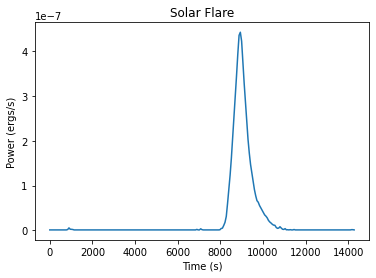

In [ ]:
import matplotlib.pyplot as plt

plt.plot(solar_data.iloc[:,0], solar_data.iloc[:,1])  # Plot the solar data
plt.title("Solar Flare")
plt.ylabel("Power (ergs/s)")
plt.xlabel("Time (s)")

plt.show()

## Basline correction

As you learned in the Week 7 lecture, one of the primary challenges in determining the total energy of the flare is dealing with the "background." The sun is giving off x-rays even before a flare happens, and we do not want to accidentally include the energy of those x-rays as part of the flare energy. As a result, we need to determine the amount of x-ray power being emitted before the flare (the "baseline") and subtract it from the observed power during the flare to make sure we are only determining the *new* energy created by the flare itself.

Make sure your team has a clear plan for this; refer back to the Week 7 pre-lab lecture, the examples of baseline corrections on the Week 7 Canvas page, or  ask your TA if you need help! 

Hint:
You will want to plot the data from the time period leading up to the flare in order to "see" it clearly and to decide on a strategy. For this part, we don't have to care yet about having time in seconds. In fact, it might be easier to leave time in arbitraty "index" units (i.e., data point 1, data point 2, data point 3, and so on). That way, it will be easy to discuss which data points you want to focus on. For example, maybe you think the pre-flare background is points 4 through 50. Then you can easily access these data points like this:

`solar_data.iloc[4:50,1]`


## **Question 1:** In a new markdown cell, explain, in words, how you are doing the baseline correction and the reasoning behind the method you chose. Be as detailed as possible!


The baseline correction is alomost neglagible in this case. This is because the data surrounding this paticular flare was calmerthan the others we have worked with.
  We plotted the curve right before a drastic increase, as seen below. There were small sharp peaks indicateing flares that we had not seen before. We used our math libraries to average this curve to get a "baseline".
  We figured this was a safe methoed becaus ethe data surrounding our flare was so smooth.

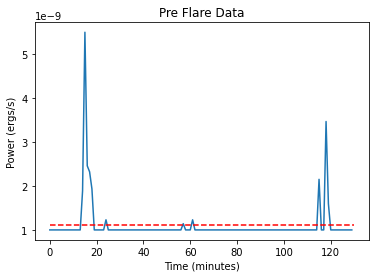

In [ ]:
# You may need the statistics library for determining means and medians
import statistics as stats     

# You will need to plot your flare (as shown in the examples of baseline corrections notebook)
# in order to look at the pre-flare data and show the baseline corrected flare
import matplotlib.pyplot as plt

# step 1: plot zoomed in data 
plt.plot(solar_data.iloc[0:130,1])   # Zoom in on data before the flare begins
plt.title("Pre Flare Data")
plt.ylabel("Power (ergs/s)")
plt.xlabel("Time (minutes)")

# Take the average to get baseline
avg_baseline = solar_data.iloc[0:130,1].mean()

x_coordinates = [0,130]
y_coordinates = [avg_baseline, avg_baseline]
plt.plot(x_coordinates, y_coordinates, 'r--')
plt.show()

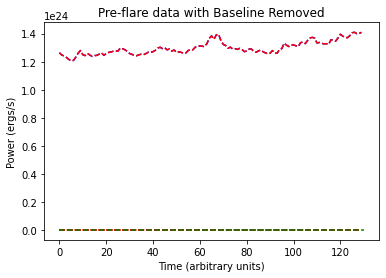

Average baseline calculation: 1.1070821163846125e-09


In [ ]:
# Subtract basline from the flare data
solar_data_blremov = solar_data['longwave (ergs/s)'].subtract(avg_baseline)

plt.plot(solar_data_blremov[0:130],'b--') # Used this range because it is the data before the solar flare
plt.title("Solar data flare with Baseline Removed")
plt.ylabel("Power (ergs/s)")
plt.xlabel("Time (arbitrary units)")

# make another plot zoomed in on pre-flare
plt.plot(solar_data[0:130], 'r--')              
plt.title("Pre-flare data with Baseline Removed")
plt.ylabel("Power (ergs/s)")
plt.xlabel("Time (arbitrary units)")
x_coordinates = [0, 130]
y_coordinates = [0, 0]
plt.plot(x_coordinates, y_coordinates, 'g--')
plt.show()

print("Average baseline calculation:",avg_baseline)

The average is so flat due to how flat our average is for our presolar flare

## Reporting total energy

Once you have determined the baseline and subtracted this "background," you are ready to determine the total flare energy. Last week, we did this for a practice flare using a function we called `integrate.trapz`. Use this same function to compute the total energy of your new flare, referring back to your work last week if you need to.

Note: As several of our teams learned last week, this function is a little tricky! Make sure to use the appropiate limits for integration by indexing the `x` and `y` variables. You also have to tell it both the y-data AND the x-data to get the integration right (by default, it integrates assuming the x-coordinates are 1, 2, 3, 4, etc.) Be careful with that this week!


## **Question 2:** In a new markdown cell, describe how you are computing the total energy produced by the flare.

After removing the background data, described by the baseline correction, we can solve for the sum. To get the total sum of irradience we integrate this curve. In Python, this is done by using the library scipy.integrate. Specifically, we are using the trapaziodal rule of integration. We do this opperation for the area under the curve including the "basline" and excluding the "baseline". We graph and diplay the sum of both. After doing the opperations, it confirms that our calculated baseline is relatively arbitrary, as the sums are nearly identical.

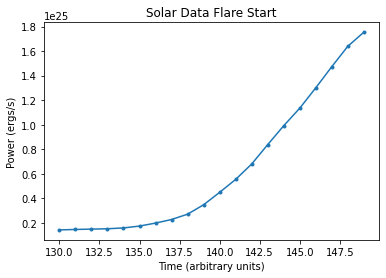

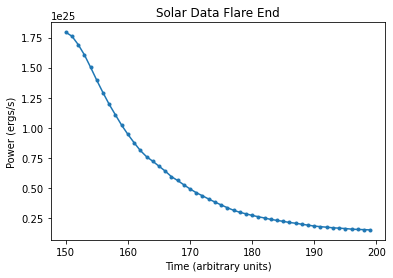


 Total area under the curve without baseline correction:  2.2220889661595984e+28  ergs


In [ ]:
#We are using trapezoidal integradion ('integreat.trapz')
import scipy.integrate as integrate

plt.plot(solar_data_blremov[130:150], '.-') #the starting point was 130 because it was just before the power in ergs/s rose sharply
plt.title("Solar Data Flare Start")
plt.ylabel("Power (ergs/s)")
plt.xlabel("Time (arbitrary units)")
plt.show()

plt.plot(solar_data_blremov[150:200], '.-') #the end started at 170 because there is a very tiny flare at the end that seems relatively irrelevant
plt.title("Solar Data Flare End")
plt.ylabel("Power (ergs/s)")
plt.xlabel("Time (arbitrary units)")
plt.show()

# Calculte area under the curve without baseline correction
# Note, the y variable comes BEFORE the x variable in integrate.trapz
A_woblc = integrate.trapz(solar_data['longwave (ergs/s)'].iloc[135:180], solar_data.iloc[135:180,0])   #using many tiny trapezoidal shapes and adding it all together the area under the curve was found

print('\n Total area under the curve without baseline correction: ', A_woblc, ' ergs')




In [ ]:
display(solar_data_blremov)

0      1.263991e+24
1      1.247141e+24
2      1.241362e+24
3      1.230047e+24
4      1.216093e+24
           ...     
234    1.281145e+24
235    1.273845e+24
236    1.278542e+24
237    1.263991e+24
238    1.263626e+24
Name: longwave (ergs/s), Length: 239, dtype: float64

In [ ]:
A_wblc = integrate.trapz(solar_data_blremov.iloc[135:180], solar_data.iloc[135:180,0])   

print('\n Total area under the curve with baseline correction: ', A_wblc, ' ergs')



 Total area under the curve with baseline correction:  2.2220889661595984e+28  ergs


The reason the total area under the curve with and without the baseline correction (2.2220889661595984e+28) ergs is the same is because the longwave (ergs) column is so large (e.g. 1.263991e+24) and the baseline correction value is so small (e.g. 1.1070821163846125e-09). We checked this by hand and found that relative to the total energy the baseline correction is negligible.


In [ ]:
pd1 = ((A_woblc - A_wblc)/A_woblc)*100
print('\n The percent difference in energy calculated \n when doing a baseline correction using the \n "subtract the average" method comparing to not doing a \n baseline correction at all: ', pd1, '%')


 The percent difference in energy calculated 
 when doing a baseline correction using the 
 "subtract the average" method comparing to not doing a 
 baseline correction at all:  0.0 %


# **Task 3: Comment, save and print to PDF**

Last, after completing each Colab notebook this semester, you will need to save and turn in *both* a .ipynb file and a PDF to Canvas. Even on team assignments like this, each member of the team will be required to submit an **identical** copy of the assignment to Canvas to receive credit.

## **Make sure all the code cells have been executed**

"Executed" means that you have pressed all the "play" buttons on the code cells.

## **Save as a .ipynb**

To save your Colab notebook as a .ipynb file, click on "File" -> "Download .ipynb". The file should automatically be saved to your computer's Downloads folder. 

## **Save as a PDF**

* To save this Colab Notebook as a PDF click File -> Print.

* In the printer dialog box select "Save as PDF" as your destination and click "Save".  

* Check the PDF to make sure everything has been printed properly.

* In Canvas, upload the PDF file as an assignment.

* If you run into an error or need help, ask your TA!

**This assignment is due by 11pm MT the day after your Week 9 lab section.**

## **Task 6*: Find more flares!**

If time allows, choose another flare from C through X class! When analyzing an additional flare, create a **new** Colab Notebook for each new flare. Follow the same procedure from above to report the total energy of the flare.

As before, make sure to provide a detailed description of the flares, which includes the date and time (in UCT) of the peak of the flare, as well as the subclass (e.g., C5.3) and other descriptive information. 